# Makemore

Noted, Coded, and Created by Han Summer 2024. Part of The 20th Summer Project

------------
### Makemore

Making more things from the data given to the model.

Under the hood, **makemore is character level language model**, it means treating every single line example of data from the training set as a sequence of individual characters.

Character level language model, simpelnya cuman prediksi huruf yang selanjutnya berdasarkan sequence huruf yang udah ada (before it)

#### Understanding the dataset

The included `names.txt` dataset, as an example, has the most common 32K names takes from [ssa.gov](https://www.ssa.gov/oact/babynames/) for the year 2018.

In [1]:
# Open the dataset (List of names) as a python list of strings which is words in this case
word= open('names.txt', 'r').read().splitlines()

In [2]:
#First 10 word
word[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(word)

32033

In [4]:
#Shortest word and longest word (word=names)
min(len(w) for w in word) , max(len(w) for w in word)

(2, 15)

Statistical sequence of characters -> names:

What char likely to start the sequence?

Whar char likely appear after given sequence of characters before it?

What char likely to appear at last of the character sequence?

#### Bigram language model
Working with 2 characters at a time -> 1 character given, predict 1 char next

Very simple and weak language model

In [5]:
for w in word[:3]:
    #Add start token and end token
    chs=['<S>']+list(w)+['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): #Iterate with 2 characters at a time (like kernel size in CNN)
        #Zip bakal stop ketika salah satu elemen habis, seperti chs[1:] habis duluan dibanding w
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [6]:
# Dictionary of bigram to count the combination of 2 characters
b={}

for w in word:
    #Add start token and end token
    chs=['<S>']+list(w)+['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): #Iterate with 2 characters at a time (like kernel size in CNN)
        #Zip bakal stop ketika salah satu elemen habis, seperti chs[1:] habis duluan dibanding w
        bigram=(ch1, ch2)
        b[bigram]=b.get(bigram, 0)+1
        

In [7]:
b #Count of bigram character combination in the dataset

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [8]:
#Sort the dictionary by value
sorted(b.items(), key=lambda kv: kv[1], reverse=True) 

# Some information from output
# n is most likely in the end of the word
# a occured in the end of the word and also before n

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

Store bigram in matrix (2D array)

Where:
- the row contains a collections of the first char
- the column contains what char follows the first char
- the value of the matrix is count of how often the second char follows the first char

In [9]:
#Array representation using PyTorch tensor
import torch

In [10]:
a=torch.zeros((3,5), dtype=torch.int32) # By default the dtype is float32 but for this case we need int32 since we count the occurence
# torch.zeros((size))
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [11]:
#Index the tensor and modify it
a[1,3]=1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

Creating tensor for the bigram

there are 26 characters and 2 extra token (start and end) = 28

In [12]:
N=torch.zeros((28,28),dtype=torch.int32)

In [13]:
#Make lookup table for character to index
chars=sorted(list(set(''.join(word)))) #Concat all the word in the dataset to 1 string, make it set which not allowing duplicate and sorted from a to z
stoi={s:i for i,s in enumerate(chars)} #Make dictionary of character to index {'a': 0, 'b': 1, 'c': 2, 'd': 3, and so on}
#Add start token and end token to the dictionary
stoi['<S>']=26
stoi['<E>']=27 

In [14]:

for w in word:
    #Add start token and end token
    chs=['<S>']+list(w)+['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): #Iterate with 2 characters at a time (like kernel size in CNN)
        #Zip bakal stop ketika salah satu elemen habis, seperti chs[1:] habis duluan dibanding w
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #Counting up the occurence of the bigram
        N[ix1, ix2]+=1
        

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

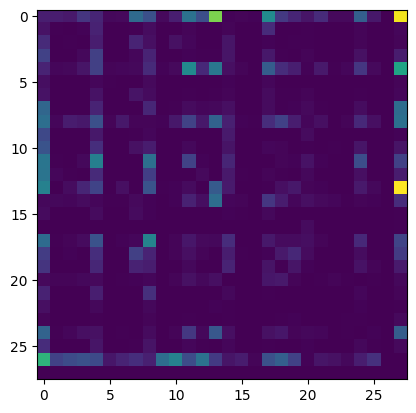

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
print(N)
plt.imshow(N)

Make visualization of matrix more beautiful

In [16]:
#Inverse the matrix
itos={v:k for k,v in stoi.items()} #Inverse of stoi
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

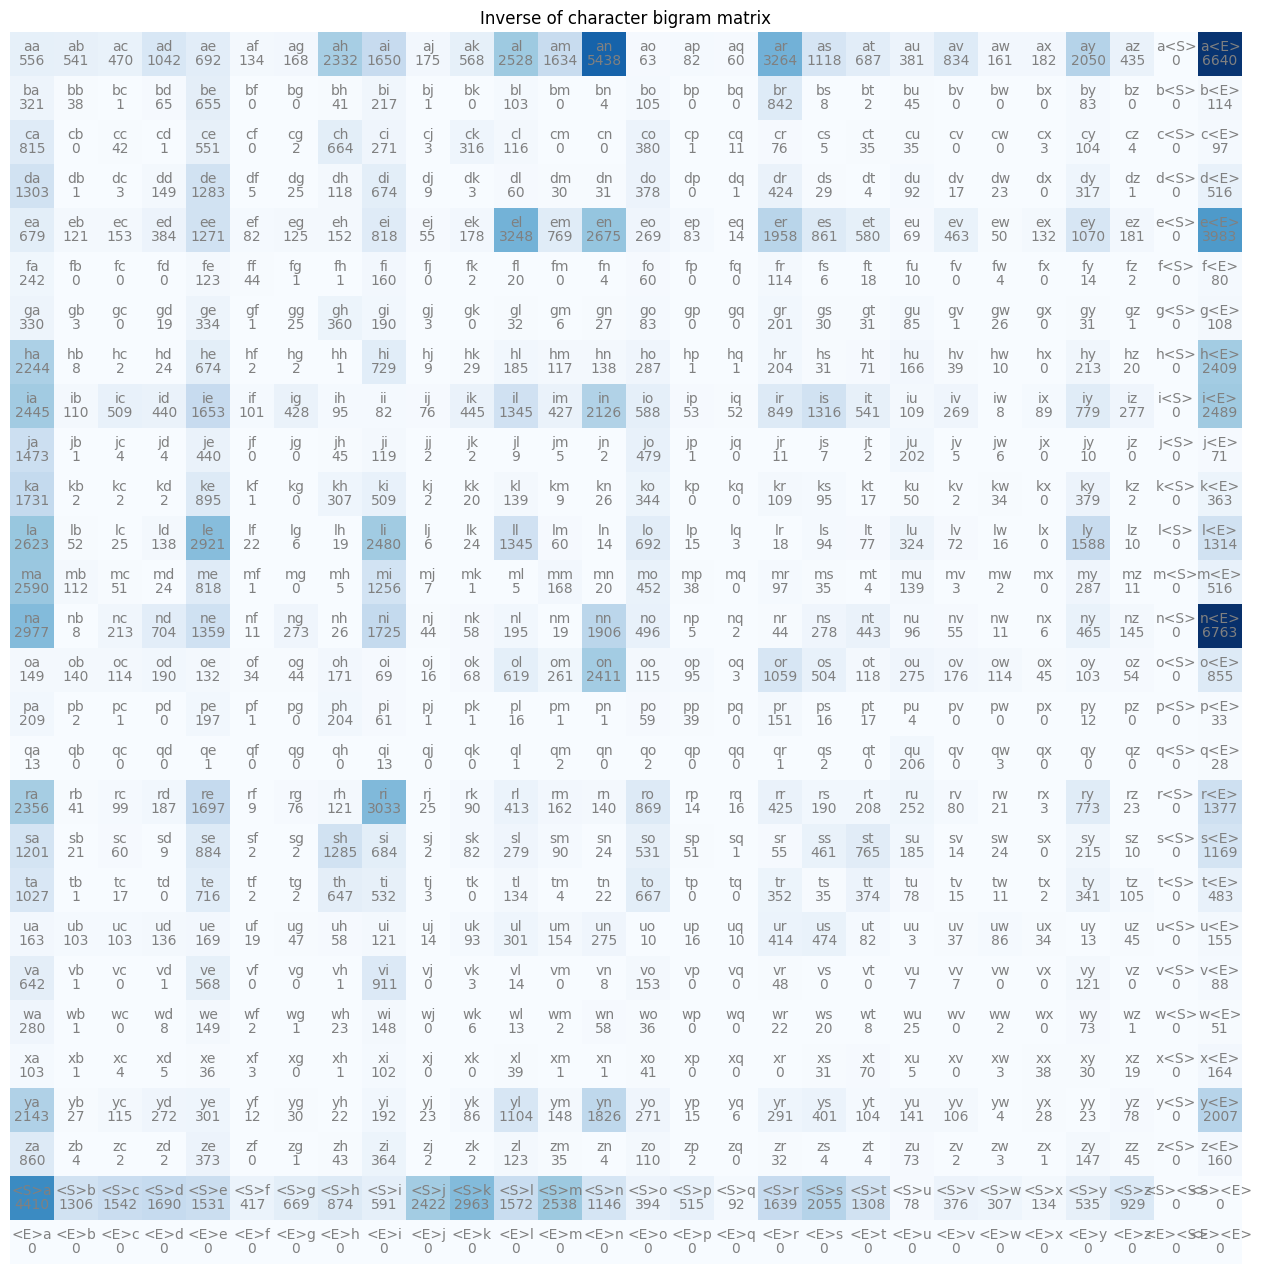

In [17]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
plt.title('Inverse of character bigram matrix')
#Iterate individual cells
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j] #Create string label for the cell
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray') #Plot the text
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray') #Plot the count of the bigram
plt.axis('off');

There are some space wasted since like '< E >' always located following a char, because it always located at the end (see last row all 0)

and '< S >' always located before a char, because it always located at the start (see column with all zero) which not possible following a char but started the char seq

Fixing it

In [18]:
#Reduce special tokens to 1, so the matrix is reduced
N=torch.zeros((27,27),dtype=torch.int32)

#Make lookup table for character to index
chars=sorted(list(set(''.join(word)))) #Concat all the word in the dataset to 1 string, make it set which not allowing duplicate and sorted from a to z
#the index will start from 1 since index 0 will be used for start/end token
stoi={s:i+1 for i,s in enumerate(chars)} #Make dictionary of character to index {'a': 1, 'b': 2, 'c': 3, 'd': 4, and so on}
#Add start token and end token to the dictionary as a '.' and located in index 0
stoi['.']=0
#Inverse the matrix
itos={v:k for k,v in stoi.items()} 

for w in word:
    #Add start token and end token
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]): #Iterate with 2 characters at a time
        #Zip bakal stop ketika salah satu elemen habis, seperti chs[1:] habis duluan dibanding w
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #Counting up the occurence of the bigram
        N[ix1, ix2]+=1
        

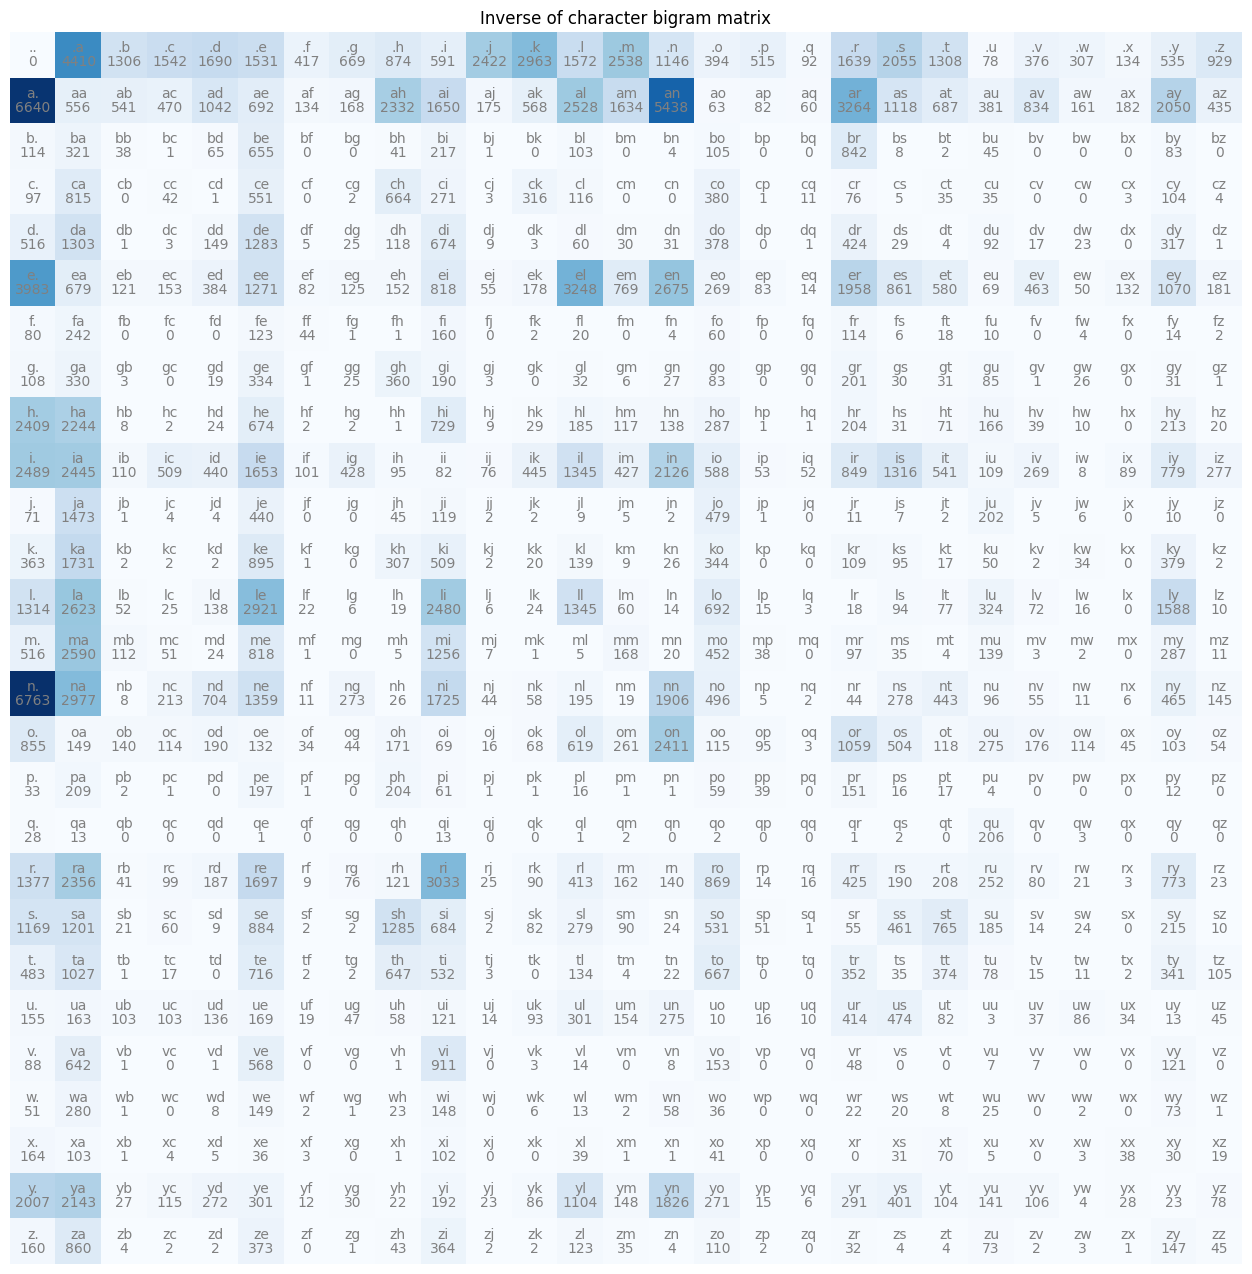

In [19]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
plt.title('Inverse of character bigram matrix')
#Iterate individual cells
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j] #Create string label for the cell
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray') #Plot the text
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray') #Plot the count of the bigram
plt.axis('off');

Space saved where see from position top left (..)

If you go right it would be . as start token

and if you go down it would be . as ending token

So , those visualized array has the information for creating bigram language model by following these probability/the counts and start sampling from the model

Sample example:

In [20]:
#N [row, column]
N[0,:] #will one dimensional array of the first row which start of the word

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [21]:
#Equivalently
N[0] #will one dimensional array of the first row which start of the word

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [22]:
#Probability distribution for first row aka the first char
p=N[0].float() #convert to float first to normalize these counts
p=p/p.sum() #normalize the counts to make it probability distribution
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [23]:
p.sum()

tensor(1.)

Try to sample from the probability distribution using torch.multinomial

multinomial basically just give probability to return integers based on the probability (sample)

Example

In [24]:
g = torch.Generator().manual_seed(2147483647) #Using torch.Generator to make the random number reproducible and same result as sensei
ps = torch.rand(3, generator=g)
ps = ps / ps.sum()
ps

tensor([0.6064, 0.3033, 0.0903])

In [25]:
torch.multinomial(ps, num_samples=20, replacement=True, generator=g) 
#Sampling 20 samples from the probability distribution, replacement=True means the same element can be sampled multiple times
#kayak idx 0 punya probability tinggi sehingga sering muncul di sample yang di return

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

Sampling from the N[0]

In [26]:
g = torch.Generator().manual_seed(2147483647)
#idk why when num_samples=1, it return not 13 but 10. So I'll just make it 2 and take the first element
ix=torch.multinomial(p, num_samples=2, replacement=True, generator=g)[0].item() 
#Since multinomial return tensor, we need to convert it to integer
itos[ix]

'm'

from the plot we see m likely starting char as a starting char

now take 'm' and sample it for the next character and so on so on so on

In [27]:
g = torch.Generator().manual_seed(2147483647)
#for loop for how many names will be generated
for i in range (20):
    out=[]
    ix=0
    while True:
        #Look up table for the row that contains a char located in the ix as the start word
        p=N[ix].float() #Take row that contains character as a start word 
        p=p/p.sum() #Make probability
        
        #Generate the sample based on the probability in the row
        ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() #Result will be diff with sensei cuz bug random seed gajelas 
        out.append(itos[ix])
        if ix==0: #This is when the char is '.' aka the end
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


Weird mess up output, since bigram language model ya begini hancur wkwkwkwk

model ini cuman tau karakter sebelumnya apa, ga tau kayak ini huruf keberapa, posisi huruf ini dimana, jadi bisa aja kejadian nge output 'a.' padahal baru 1 huruf

Ada inefficiency issue di code tadi, mari fix
```py
    while True:
        #Look up table for the row that contains a char located in the ix as the start word
        p=N[ix].float() #Take row that contains character as a start word 
        p=p/p.sum() #Make probability
```
Di bagian code ini, p secara terus menerus di declare, ubah ke float terus dibagi setiap loop

Jadi mending siapkan matrix baru yaitu matrix P buat nyimpen probability dari matrix N

In [28]:
P=N.float() #Convert to float first
#-----------
#Vectorizing the sum() function for each row (axis=1), if not, it will sum all the element in the matrix
# axis -> 0 for column, 1 for row | ([column,row]) : ([0,1])
#Keep dim is to keep the dimension of the tensor, so it will be 27x1 instead of 27 and can be broadcasted correctly
P.sum(axis=1, keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [29]:
P=P/P.sum(1, keepdim=True)

#Broadcasting is to make the shape of the tensor to be the same so it can be operated (PENTING, SALAH MAININ DIMENSI, NGERUSAK SEMUA)
#P shape is 27x27
#P.sum(1) is to sum the row, so the shape will be 27x1
#P.sum(1) would be broadcasted to 27x27, so each element in the row will be divided by the sum of the row
#If keepdim is disabled the shape will be 27, and in the broadcasting process the shape will be 1x27 first which is a row vector
# 27 27
#    27 # It would go to the right side to match the shape of the upper tensor
# And row vector is copied vertically, so it is normalizing the column not the rows

# When keep dim is true, the shape will be 27x1, so it will be broadcasted to 27x27 as a column vector horizontally

In [30]:
g = torch.Generator().manual_seed(2147483647)
#for loop for how many names will be generated
for i in range (20):
    out=[]
    ix=0
    while True:
        p=P[ix]
        
        
        #Generate the sample based on the probability in the row
        ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() #Result will be diff with sensei cuz bug random seed gajelas 
        out.append(itos[ix])
        if ix==0: #This is when the char is '.' aka the end
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


Loss Function  (the negative log likelihood of the data under our model)

In [31]:
for w in word[:3]:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #Probability of the model assigns to the bigram in the training set
        prob=P[ix1, ix2]
        print(f'{ch1}{ch2} : {prob:.4f}')
        

.e : 0.0478
em : 0.0377
mm : 0.0253
ma : 0.3899
a. : 0.1960
.o : 0.0123
ol : 0.0780
li : 0.1777
iv : 0.0152
vi : 0.3541
ia : 0.1381
a. : 0.1960
.a : 0.1377
av : 0.0246
va : 0.2495
a. : 0.1960


In [32]:
1/27 #If the model has the probability of 1/27 for each character, it will be the same as the uniform distribution

0.037037037037037035

So if the model assigns a probability of a bigram pair higher than approx. 0.0370 means model has learnt something

To summarize those probability to know the quality of the model, we can use **likelihood** (since this is statistical modeling). 

Likelihood is a product of all those probability it's telling us about the probability of the entire dataset assigned by the model, so the result must be as high as possible

But the result of product itu kurang cocok untuk dipake karena probability itu 0-1 (terus koma koma), kalau di kali terus jadi banyak angka dibelakang koma. Makannya make **log likelihood** supaya lebih enak dipakai

So we take the log of the probability

log from 0 to 1 -> higher numbers more closer to 0 and lower the number will result more negative number

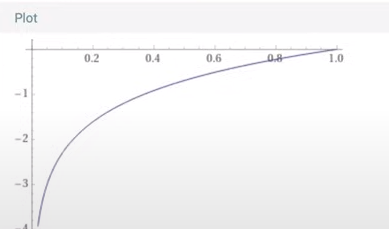

log likelihood is the sum of the log(probability) of each bigram in the dataset

log(a * b * c) = log(a)+log(b)+log(c)

In [33]:
log_likelihood=0.0
n=0
for w in word[:3]:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #Probability of the model assigns to the bigram in the training set
        prob=P[ix1, ix2]
        logprob=torch.log(prob) #log(probability)
        log_likelihood+=logprob #sum of log(probability)
        n+=1 #for counting the number of bigram and for average negative log likelihood
        print(f'{ch1}{ch2} : {prob:.4f}, {logprob:.4f}')
print(f'Log-likelihood: {log_likelihood:.4f}')

.e : 0.0478, -3.0408
em : 0.0377, -3.2793
mm : 0.0253, -3.6772
ma : 0.3899, -0.9418
a. : 0.1960, -1.6299
.o : 0.0123, -4.3982
ol : 0.0780, -2.5508
li : 0.1777, -1.7278
iv : 0.0152, -4.1867
vi : 0.3541, -1.0383
ia : 0.1381, -1.9796
a. : 0.1960, -1.6299
.a : 0.1377, -1.9829
av : 0.0246, -3.7045
va : 0.2495, -1.3882
a. : 0.1960, -1.6299
Log-likelihood: -38.7856


highest log likelihood -> 0 (all probabilites are 0), the lower is the probability more negative the log likelihood

but we need a loss function and loss needs to be low (kebalikan log likelihood yang mendekati 0 makin bagus)

Jadi disitulah ada **negative log likelihood**

In [34]:
nll=-log_likelihood
print(f'Negative Log-likelihood: {nll=}')

Negative Log-likelihood: nll=tensor(38.7856)


In [35]:
#Optional normalize negative log likelihood (avg negative log likehood)
print(f'Normalized Negative Log-likelihood: {nll/n}') #This is the loss training dataset assign by the bigram model

Normalized Negative Log-likelihood: 2.424102306365967


In [36]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling), parameter-> probability
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [37]:
#For all data
log_likelihood=0.0
n=0
for w in word:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #Probability of the model assigns to the bigram in the training set
        prob=P[ix1, ix2]
        logprob=torch.log(prob) #log(probability)
        log_likelihood+=logprob #sum of log(probability)
        n+=1 #for counting the number of bigram and for average negative log likelihood
        # print(f'{ch1}{ch2} : {prob:.4f}, {logprob:.4f}')
print(f'Log-likelihood: {log_likelihood:.4f}')
nll=-log_likelihood
print(f'Negative Log-likelihood: {nll=}')
print(f'Normalized Negative Log-likelihood: {nll/n}')

Log-likelihood: -559891.7500
Negative Log-likelihood: nll=tensor(559891.7500)
Normalized Negative Log-likelihood: 2.454094171524048


Fyi we can specify a word and take a look what probability it will appear from the model based on the probability of bigram from the training set

In [38]:
#For all data
log_likelihood=0.0
n=0
for w in ['hans']:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #Probability of the model assigns to the bigram in the training set
        prob=P[ix1, ix2]
        logprob=torch.log(prob) #log(probability)
        log_likelihood+=logprob #sum of log(probability)
        n+=1 #for counting the number of bigram and for average negative log likelihood
        print(f'{ch1}{ch2} : {prob:.4f}, {logprob:.4f}')
print(f'Log-likelihood: {log_likelihood:.4f}')
nll=-log_likelihood
print(f'Negative Log-likelihood: {nll=}')
print(f'Normalized Negative Log-likelihood: {nll/n}')

.h : 0.0273, -3.6014
ha : 0.2946, -1.2220
an : 0.1605, -1.8296
ns : 0.0152, -4.1885
s. : 0.1442, -1.9365
Log-likelihood: -12.7780
Negative Log-likelihood: nll=tensor(12.7780)
Normalized Negative Log-likelihood: 2.5555918216705322


But there are situation that a reasonable name but the dataset does not contain it and it will return (inf)

In [39]:
#For all data
log_likelihood=0.0
n=0
for w in ['hansjq']:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #Probability of the model assigns to the bigram in the training set
        prob=P[ix1, ix2]
        logprob=torch.log(prob) #log(probability)
        log_likelihood+=logprob #sum of log(probability)
        n+=1 #for counting the number of bigram and for average negative log likelihood
        print(f'{ch1}{ch2} : {prob:.4f}, {logprob:.4f}')
print(f'Log-likelihood: {log_likelihood:.4f}')
nll=-log_likelihood
print(f'Negative Log-likelihood: {nll=}')
print(f'Normalized Negative Log-likelihood: {nll/n}')

.h : 0.0273, -3.6014
ha : 0.2946, -1.2220
an : 0.1605, -1.8296
ns : 0.0152, -4.1885
sj : 0.0002, -8.3072
jq : 0.0000, -inf
q. : 0.1029, -2.2736
Log-likelihood: -inf
Negative Log-likelihood: nll=tensor(inf)
Normalized Negative Log-likelihood: inf


jq : 0.0000, -inf -> in the plt figure jq is 0

to fix this, implement model smoothing by adding some fake counts (like adding 1 as start of the bigram counter not 0)

In [40]:
P=(N+1).float() #Add one to the count to avoid zero probability, more add count more uniform the model is
P=P/P.sum(1, keepdim=True) #Normalize the row

In [41]:
g = torch.Generator().manual_seed(2147483647)
#for loop for how many names will be generated
for i in range (20):
    out=[]
    ix=0
    while True:
        p=P[ix]
        
        
        #Generate the sample based on the probability in the row
        ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() #Result will be diff with sensei cuz bug random seed gajelas 
        out.append(itos[ix])
        if ix==0: #This is when the char is '.' aka the end
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


It may change the result of the character prediction, but it will remove the inf

In [42]:
#For all data
log_likelihood=0.0
n=0
for w in ['hansjq']:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #Probability of the model assigns to the bigram in the training set
        prob=P[ix1, ix2]
        logprob=torch.log(prob) #log(probability)
        log_likelihood+=logprob #sum of log(probability)
        n+=1 #for counting the number of bigram and for average negative log likelihood
        print(f'{ch1}{ch2} : {prob:.4f}, {logprob:.4f}')
print(f'Log-likelihood: {log_likelihood:.4f}')
nll=-log_likelihood
print(f'Negative Log-likelihood: {nll=}')
print(f'Normalized Negative Log-likelihood: {nll/n}')

.h : 0.0273, -3.6011
ha : 0.2937, -1.2251
an : 0.1604, -1.8302
ns : 0.0152, -4.1864
sj : 0.0004, -7.9051
jq : 0.0003, -7.9817
q. : 0.0970, -2.3331
Log-likelihood: -29.0627
Negative Log-likelihood: nll=tensor(29.0627)
Normalized Negative Log-likelihood: 4.151820182800293


jq now is very small probability